In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.switch_backend('agg')
from matplotlib import rc,rcParams
from collections import OrderedDict 


In [11]:
def parse_robustness_network(infiledir,infilename,K,legend_col,split='_'):
    #from collections import OrderedDict 
    
    data=pd.read_csv(infiledir+infilename)
    legend_num=data[legend_col].values
    legend_name=[]
    for l in legend_num:
        #name=legend_col+split+str(l)
        name=l
        legend_name.append(name)
        
    rulea1=data['c1_vol'].values
    ruleb1=data['c1_ruleb'].values
    ruleab1=data['c1_rule'].values
    
    ruleb12=data['total_rule'].values
    ruleab=ruleab1+data['c2_rule'].values
        
    if len(K)==1:
        rulea1=rulea1/K[0]
        ruleb1=ruleb1/K[0]
        ruleab1=ruleab1/K[0]
    
        ruleb12=ruleb12/K[0]
        ruleab=ruleab/K[0]
    
    else:
        rulea1=np.divide(rulea1,K)
        ruleb1=np.divide(ruleb1,K)
        ruleab1=np.divide(ruleab1,K)
        
        ruleb12=np.divide(ruleb12,K)
        ruleab=np.divide(ruleab,K)
    
    errs_dict=OrderedDict()
    for l in range(0,len(legend_num)):
        name=legend_name[l]
        arr=np.array([rulea1[l],ruleb1[l],ruleab1[l],ruleb12[l],ruleab[l]])
        errs_dict[name]=arr
    
    return errs_dict
    
    
        

In [12]:
def parse_robustness_model(infiledir,infilename,k,legend_col='beta2='):
    from collections import OrderedDict 
    
    data=pd.read_csv(infiledir+infilename)
    bi=[1,0.9,0.7,0.5,0.3,0.1]
    legend_name=[]
    dic_key=[] #xtick_labels
    for b in bi: 
        name=legend_col+str(b)
        legend_name.append(name)
        dic_key.append('beta1='+str(b))
    
    rulea1_dict=OrderedDict()
    ruleb1_dict=OrderedDict()
    ruleab1_dict=OrderedDict()
    
    ruleb12_dict=OrderedDict()
    ruleab_dict=OrderedDict()
    j=0
    for b1 in bi:    
        tmp=data.loc[data['beta2'] == b1]
        rulea1=tmp['c1_vol'].values #all beta1 values for corresponding beta2
        ruleb1=tmp['c1_ruleb'].values
        ruleab1=tmp['c1_rule'].values
    
        ruleb12=tmp['total_rule'].values
        ruleab=ruleab1+tmp['c2_rule'].values
        #for j in range(0.len(bi)): #beta2_values
        #    arr=np.array([rulea1[j],ruleb1[j],ruleab1[j],ruleb12[j],ruleab[j]])
        beta2_key=legend_name[j]   
        rulea1_dict[beta2_key]=rulea1/k #all beta1 of rule 1a
        ruleb1_dict[beta2_key]=ruleb1/k
        ruleab1_dict[beta2_key]=ruleab1/k
            
        ruleb12_dict[beta2_key]=ruleb12/k
        ruleab_dict[beta2_key]=ruleab/k
        j+=1
    
    return rulea1_dict,ruleb1_dict,ruleab1_dict,ruleb12_dict,ruleab_dict,legend_name,dic_key

In [13]:
def plot_grouped_bar_chart(error_dict,xticklabels,figname,title,yl=1.0,color=['r','b','c','y','g','m','k','orange','olive',(0.502, 0.000, 0.502)]):
    last_idx=(0.502, 0.000, 0.502)
    print('bar chart')
    print(error_dict[list(error_dict.keys())[0]])
    
    N=len(error_dict[list(error_dict.keys())[0]])
    
    fig, ax = plt.subplots(1,1,figsize=(10,4))

    ind = np.arange(N)    # the x locations for the groups
    width1 = 0.05        # the width of the bars
    #width2=0
    bars=list()
    k=1
    for idx,model_name in enumerate(error_dict.keys()):
        #print(model_name,len(error_dict[model_name]))
        _p = ax.bar(ind+((idx-k)*width1), error_dict[model_name], width1, bottom=0,color=color[idx])
        bars.append(_p)
    
    
    ax.set_xticks(ind + width1/ 2)
   
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
        # specify integer or one of preset strings, e.g.
        #tick.label.set_fontsize('x-small')
        tick.label.set_rotation(45)
   
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
   
    ax.set_xticklabels(xticklabels)
    ax.set_ylim([0, yl])
    #ax.set_xlabel("National",fontsize=24)
    #ax.set_ylabel('RMSE',fontsize=24)
    ax.set_title(figname+' '+title)
    ax.legend(bars,error_dict.keys(),fontsize=14,bbox_to_anchor=(1.01, 1.05))
    #fig.tight_layout()
    #fig.savefig(figname+'-'+title+'.png',dpi=500)
    #fig.savefig(figname+'-'+title+'.png')


In [5]:
title='beta2 for (!TL->ES)'
k=50
infiledir='../output/domain_based_pj/check_robustness_b1_b3/'
infilename='power_system_graph_robustness_b1_b3.csv'
vol_dict,ruleb1_dict,ruleab1_dict,ruleb12_dict,ruleab_dict,legend,xticklabels=parse_robustness_model(infiledir,infilename,k)

plot_grouped_bar_chart(vol_dict,xticklabels,'v>=345',title,color=['r','y','b','k','m','g'])

plot_grouped_bar_chart(ruleb1_dict,xticklabels,'near-military',title,color=['r','y','b','k','m','g'])

plot_grouped_bar_chart(ruleab1_dict,xticklabels,'v>=345+near-military',title,color=['r','y','b','k','m','g'])

plot_grouped_bar_chart(ruleb12_dict,xticklabels,'near-DCEI',title,color=['r','y','b','k','m','g'])

plot_grouped_bar_chart(ruleab_dict,xticklabels,'v>=345+near-DCEI',title,color=['r','y','b','k','m','g'])

FileNotFoundError: [Errno 2] No such file or directory: '../output/domain_based_pj/check_robustness_b1_b3/power_system_graph_robustness_b1_b3.csv'

In [5]:
def plot_edge_robustness(x,k,b1,b2,b3,b4,b5,b6,title):
    #plt.figure(figsize = (10,9))
    
    plt.plot(x, b1/k,color= 'g', lw = 4, label='beta1=1')
    plt.plot(x, b2/k,color= 'b', lw = 4, label='beta1=0.9')
    plt.plot(x, b3/k,color= 'k', lw = 4, label='beta1=0.7')
    plt.plot(x, b4/k,color= 'm', lw = 4, label='beta1=0.5')
    plt.plot(x, b5/k,color= 'y', lw = 4, label='beta1=0.3')
    plt.plot(x, b6/k,color= 'r', lw = 4, label='beta1=0.1')
    
    x_lab = [y for y in x]
    print(len(x))
    plt.xticks(x, x_lab, fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=15, loc=(1.01,0.05))
    plt.ylim(0, 1)
    plt.xlim(0,1.1) #27
    plt.title(title)
    plt.show()

bar chart
[0.86 0.16 0.16 0.54 0.52]


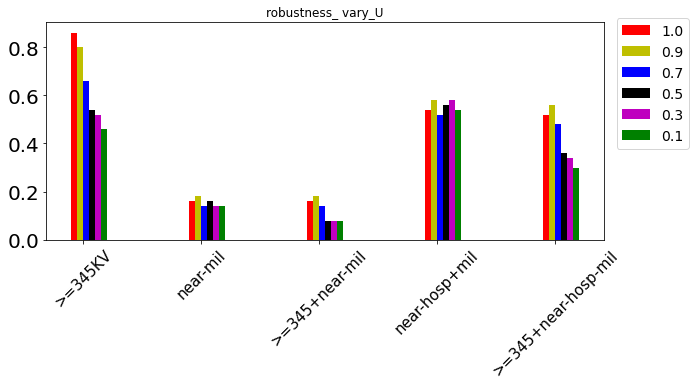

In [6]:
title='vary_U'
#K=[25,50,100,200,800,1600,3200,5000]
K=[50]
#infiledir='../output/domain_based_pj/check_robustness_U/'
#infiledir='../output/domain_added_tl_tes/check_robustness_K/'
infiledir='../output/domain_added_tl_tes/check_robustness_comp_u/'
infilename='power_subgraph_robustness.csv'
legend_col='beta1'
#legend_col='K'
per_dict=parse_robustness_network(infiledir,infilename,K,legend_col)

xticklabels=['>=345KV','near-mil','>=345+near-mil','near-hosp+mil','>=345+near-hosp-mil']

figname="robustness_"
#color=['y','r','b','k','m','g','c','orange','olive']
color=['r','y','b','k','m','g']
plot_grouped_bar_chart(per_dict,xticklabels,figname,title,color=color)

<ipython-input-9-643b5cca7492>:32: RuntimeWarning: divide by zero encountered in true_divide
  gain['pr1']=per_dict['our_model']/per_dict['pagerank_weighted']


[2.89698617 1.20577922 1.84      ]
bar chart
[0.9  0.18 0.16 0.56 0.54]
bar chart
[0.9  0.18 0.16 0.56 0.54]


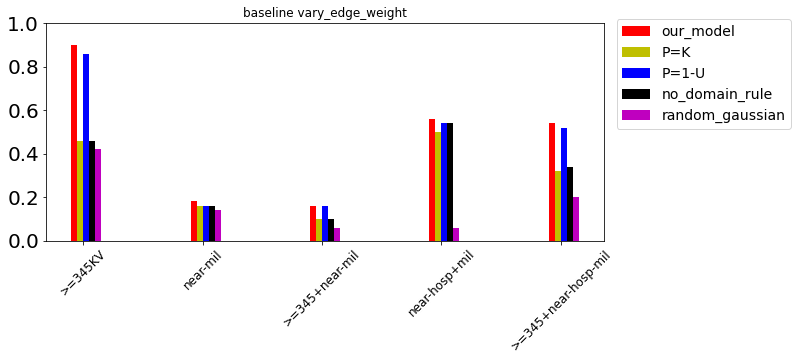

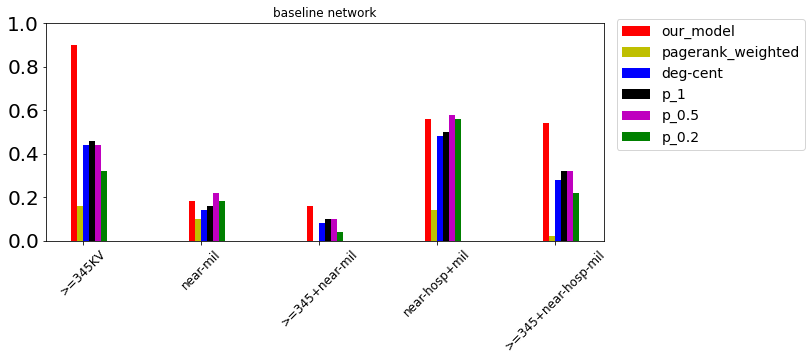

In [9]:
title1='vary_edge_weight'
title2='network'
#K=[25,50,100,200,800,1600,3200,5000]
K=[50]
infiledir='../output/'
infilename='power_system_graph_baseline.csv'
legend_col='pj'
our_model=np.array([45,9,8,28,27])
our_model=our_model/K[0]
#legend_col='K'
per_dict=parse_robustness_network(infiledir,infilename,K,legend_col)
per_dict['our_model']=our_model
xticklabels=['>=345KV','near-mil','>=345+near-mil','near-hosp+mil','>=345+near-hosp-mil']

#print(per_dict.keys())
baseline1=OrderedDict()
baseline1['our_model']=per_dict['our_model']
baseline1['P=K']=per_dict['pij=kij']
baseline1['P=1-U']=per_dict['pij=(1-uj)']
baseline1['no_domain_rule']=per_dict['no_domain_rule']
baseline1['random_gaussian']=per_dict['random_normal']
#print(len(list(baseline1.keys())))
baseline2=OrderedDict()
baseline2['our_model']=per_dict['our_model']
baseline2['pagerank_weighted']=per_dict['pagerank_weighted']
baseline2['deg-cent']=per_dict['deg-cent']
baseline2['p_1']=per_dict['p_1']
baseline2['p_0.5']=per_dict['p_0.5']
baseline2['p_0.2']=per_dict['p_0.2']

gain={}
gain['pr1']=per_dict['our_model']/per_dict['pagerank_weighted']
gain['deg']=per_dict['our_model']/per_dict['deg-cent']
gain['p_1']=per_dict['our_model']/per_dict['p_1']
gain['p_0.5']=per_dict['our_model']/per_dict['p_0.5']
gain['p_0.2']=per_dict['our_model']/per_dict['p_0.2']

mean_gain=np.zeros(3)
mean_gain[0]=(gain['pr1'][0]+gain['deg'][0]+gain['p_1'][0]+gain['p_0.5'][0]+gain['p_0.2'][0])/5
mean_gain[1]=(gain['pr1'][1]+gain['deg'][1]+gain['p_1'][1]+gain['p_0.5'][1]+gain['p_0.2'][1])/5
mean_gain[2]=(gain['deg'][2]+gain['p_1'][2]+gain['p_0.5'][2]+gain['p_0.2'][2])/5

print(mean_gain)
figname="baseline"
#color=['y','r','b','k','m','g','c','orange','olive']
#color=['y','b','k','m','g','c','pink','orange','olive',(0.502, 0.000, 0.502),'r']
color1=['r','y','b','k','m']
color2=['r','y','b','k','m','g']
plot_grouped_bar_chart(baseline1,xticklabels,figname,title1,color=color1)
plot_grouped_bar_chart(baseline2,xticklabels,figname,title2,color=color2)
                               

national
[0.32 0.04 0.02]
[0.12 0.04 0.  ]
[0.02 0.02 0.  ]
ERCOT
[0.04 0.   0.  ]
[0.32 0.   0.  ]
[0.34 0.   0.  ]
EI
[0.26 0.04 0.02]
[0.24 0.06 0.02]
[0.12 0.04 0.  ]
bar chart
[0.88 0.22 0.2 ]
bar chart
[0.04 0.   0.  ]
bar chart
[0.26 0.04 0.02]


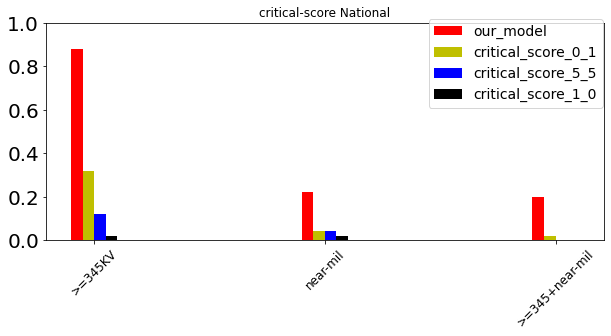

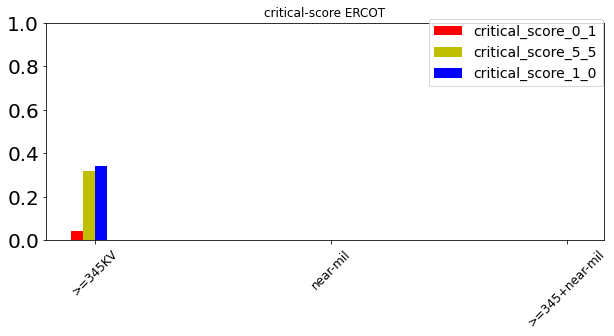

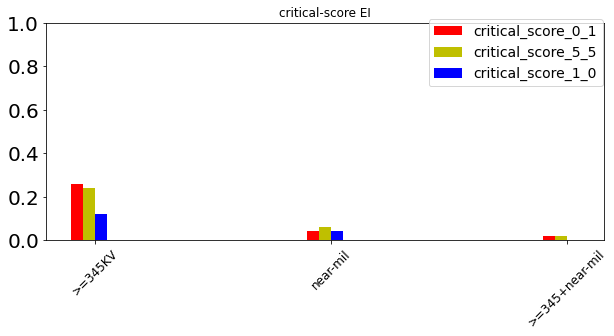

In [9]:
title1='National'
title2='ERCOT'
title3='EI'

k=[50]

xticklabels=['>=345KV','near-mil','>=345+near-mil']

#print(per_dict.keys())
#our_model_r1=np.array([44,11,10])/k[0]
baseline1=OrderedDict()
baseline1['our_model']=np.array([44,11,10])/k[0]
baseline1['critical_score_0_1']=np.array([16,2,1])/k[0]
baseline1['critical_score_5_5']=np.array([6,2,0])/k[0]
baseline1['critical_score_1_0']=np.array([1,1,0])/k[0]
print('national')
print(baseline1['critical_score_0_1'])
print(baseline1['critical_score_5_5'])
print(baseline1['critical_score_1_0'])

#our_model_r2=np.array([32,6,0])/k[0]
baseline2=OrderedDict()
#baseline2['our_model']=np.array([32,6,0])/k[0]
baseline2['critical_score_0_1']=np.array([2,0,0])/k[0]
baseline2['critical_score_5_5']=np.array([16,0,0])/k[0]
baseline2['critical_score_1_0']=np.array([17,0,0])/k[0]
print('ERCOT')
print(baseline2['critical_score_0_1'])
print(baseline2['critical_score_5_5'])
print(baseline2['critical_score_1_0'])

our_model_r3=np.array([39,5,5])/k[0]
baseline3=OrderedDict()
#baseline3['our_model']=np.array([39,5,5])/k[0]
baseline3['critical_score_0_1']=np.array([13,2,1])/k[0]
baseline3['critical_score_5_5']=np.array([12,3,1])/k[0]
baseline3['critical_score_1_0']=np.array([6,2,0])/k[0]
print('EI')
print(baseline3['critical_score_0_1'])
print(baseline3['critical_score_5_5'])
print(baseline3['critical_score_1_0'])

figname="critical-score"
#color=['y','r','b','k','m','g','c','orange','olive']
#color=['y','b','k','m','g','c','pink','orange','olive',(0.502, 0.000, 0.502),'r']
color1=['r','y','b','k']

plot_grouped_bar_chart(baseline1,xticklabels,figname,title1,yl=1,color=color1)
plot_grouped_bar_chart(baseline2,xticklabels,figname,title2,yl=1,color=color1)
plot_grouped_bar_chart(baseline3,xticklabels,figname,title3,yl=1,color=color1)

In [ ]:
title1='ERCOT_ablation_test'
title2='ERCOT_baselines'
#K=[25,50,100,200,800,1600,3200,5000]
K=[50]
infiledir='../output/'
infilename='power_system_graph_baseline.csv'
legend_col='pj'
our_model=np.array([45,9,8,28,27])
our_model=our_model/K[0]
#legend_col='K'
per_dict=parse_robustness_network(infiledir,infilename,K,legend_col)
per_dict['our_model']=our_model
xticklabels=['>=345KV','near-mil','>=345+near-mil','near-hosp+mil','>=345+near-hosp-mil']

#print(per_dict.keys())
baseline1=OrderedDict()
baseline1['our_model']=per_dict['our_model']
baseline1['P=K']=per_dict['pij=kij']
baseline1['P=1-U']=per_dict['pij=(1-uj)']
baseline1['no_domain_rule']=per_dict['no_domain_rule']
baseline1['random_gaussian']=per_dict['random_normal']
#print(len(list(baseline1.keys())))
baseline2=OrderedDict()
baseline2['our_model']=per_dict['our_model']
baseline2['pagerank_weighted']=per_dict['pagerank_weighted']
baseline2['deg-cent']=per_dict['deg-cent']
baseline2['p_1']=per_dict['p_1']
baseline2['p_0.5']=per_dict['p_0.5']
baseline2['p_0.2']=per_dict['p_0.2']

figname="baseline"
#color=['y','r','b','k','m','g','c','orange','olive']
#color=['y','b','k','m','g','c','pink','orange','olive',(0.502, 0.000, 0.502),'r']
color1=['r','y','b','k','m']
color2=['r','y','b','k','m','g']
plot_grouped_bar_chart(baseline1,xticklabels,figname,title1,color=color1)
plot_grouped_bar_chart(baseline2,xticklabels,figname,title2,color=color2)

bar chart
[0.66, 0.17, 0.13, 0.33, 0.2]


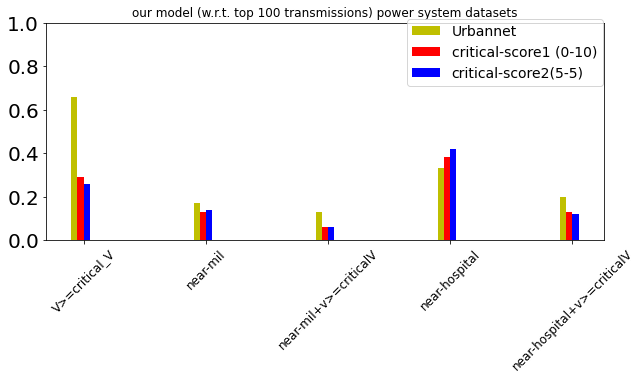

In [19]:
title='power system datasets'
k=[100,100,100]
#k=[50,50,50]
state=['IC-model','critical-score1 (0-10)','critical-score2(5-5)']
#state=['TX','GA','VA','OH','NY','PA','CA']
#orig_mil=[42,20,42,32,15,17,16,50]
#orig_mil={'TX':42,'GA':20,'VA':42,'AL':32,'OH':15,'NY':17,'PA':16,'CA':50}
rules={}
rules[state[0]]=[66,17,13,33,20]
rules[state[1]]=[29,13,6,38,13]
rules[state[2]]=[26,14,6,42,12]
'''
rules_orig={}
rules_orig['ERCOT']=np.array([259,280,11,327,6])/3456
rules_orig['EIC']=np.array([1048,2343,75,2342,75])/25610
#rules['NPCC']=[33,6,8,10,7,15]
rules_orig['National']=np.array([1660,4201,99,3736,93])/41600
#rules_orig['Urban-Net']=np.array([1660,4201,99,3736,93])/42100
'''
per_dict=OrderedDict()
n=0
for reg in state:
    l=rules[reg]
    #if reg=='Urban-Net':
    #    k1=100
    #    tl=[l[0]/k1,l[1]/k1,l[2]/k1,l[3]/k1,l[4]/k1]
    #else:
    tl=[l[0]/k[n],l[1]/k[n],l[2]/k[n],l[3]/k[n],l[4]/k[n]]
    per_dict[reg]=tl
    n+=1
'''
per_dict_orig=OrderedDict()
for reg in state:
    per_dict_orig[reg]=rules_orig[reg]
'''
xticklabels=['V>=critical_V','near-mil','near-mil+v>=criticalV','near-hospital','near-hospital+v>=criticalV']
figname1="our model (w.r.t. top 100 transmissions)"
#figname2="original (w.r.t. all transmission nodes)"
color=['y','r','b']
plot_grouped_bar_chart(per_dict,xticklabels,figname1,title,color=color)

#plot_grouped_bar_chart(per_dict_orig,xticklabels,figname2,title,color=color)


[0.76       0.14       0.1        0.26666667 0.21333333]
bar chart
[0.64, 0.12, 0.0, 0.1, 0.02]
bar chart
[0.02 0.   0.   0.04 0.  ]


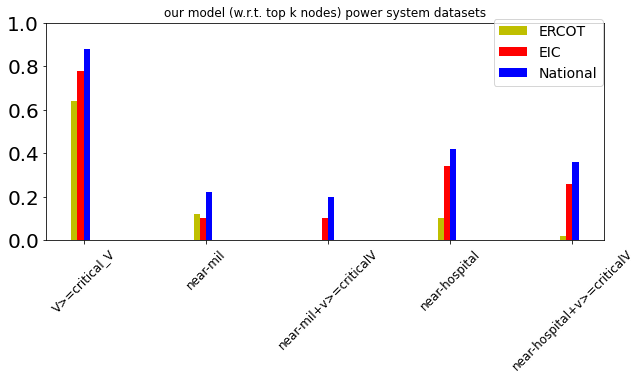

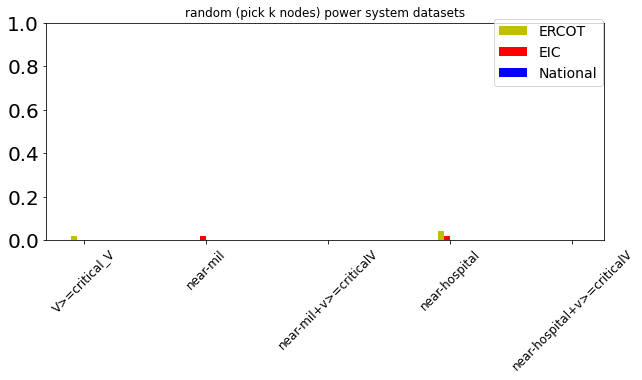

In [6]:
title='power system datasets'
#k=[50,50,37]
k=[50,50,50]
state=['ERCOT','EIC','National']
#state=['TX','GA','VA','OH','NY','PA','CA']
#orig_mil=[42,20,42,32,15,17,16,50]
#orig_mil={'TX':42,'GA':20,'VA':42,'AL':32,'OH':15,'NY':17,'PA':16,'CA':50}
rules={}
#rules['WECC']=[41,6,6,7,3,9]
rules['ERCOT']=[32,6,0,5,1]
rules['EIC']=[39,5,5,17,13]
#rules['NPCC']=[33,6,8,10,7,15]
rules['National']=[44,11,10,21,18]
#rules['Urban-Net']=[66,17,13,33,20]
'''
rules_orig={}
rules_orig['ERCOT']=np.array([259,280,11,327,6])/3456
rules_orig['EIC']=np.array([1048,2343,75,2342,75])/25610
#rules['NPCC']=[33,6,8,10,7,15]
rules_orig['National']=np.array([1660,4201,99,3736,93])/41600
#rules_orig['Urban-Net']=np.array([1660,4201,99,3736,93])/42100
'''
rules_orig={}
rules_orig['ERCOT']=np.array([1,0,0,2,0])/k[0]
rules_orig['EIC']=np.array([0,1,0,1,0])/k[1]
#rules['NPCC']=[33,6,8,10,7,15]
rules_orig['National']=np.array([0,0,0,0,0])/k[2]
num_rules=5
mean_gain=np.zeros(num_rules)
per_dict=OrderedDict()
n=0
for reg in state:
    l=rules[reg]
    #if reg=='Urban-Net':
    #    k1=100
    #    tl=[l[0]/k1,l[1]/k1,l[2]/k1,l[3]/k1,l[4]/k1]
    #else:
    tl=[l[0]/k[n],l[1]/k[n],l[2]/k[n],l[3]/k[n],l[4]/k[n]]
    per_dict[reg]=tl
    for i in range(num_rules):
        mean_gain[i]+=(tl[i]-rules_orig[reg][i])
    n+=1

mean_gain/=len(list(rules_orig.keys()))
print(mean_gain)
per_dict_orig=OrderedDict()
for reg in state:
    per_dict_orig[reg]=rules_orig[reg]

xticklabels=['V>=critical_V','near-mil','near-mil+v>=criticalV','near-hospital','near-hospital+v>=criticalV']
figname1="our model (w.r.t. top k nodes)"
figname2="random (pick k nodes)"
color=['y','r','b']
plot_grouped_bar_chart(per_dict,xticklabels,figname1,title,color=color)

plot_grouped_bar_chart(per_dict_orig,xticklabels,figname2,title,color=color)


[0. 0. 0. 0.]
bar chart
[17.4430888  37.28425121 21.1505618 ]


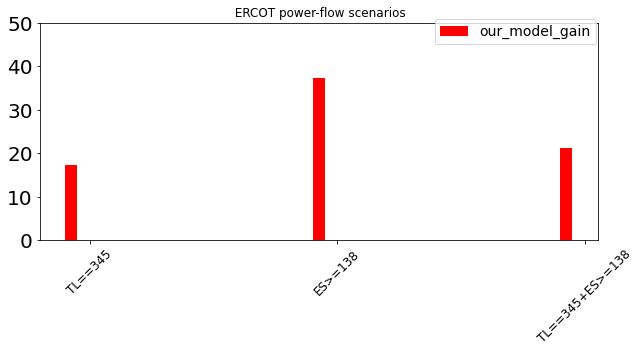

In [16]:
title2='ERCOT power-flow scenarios'
k=50
rules_ab=OrderedDict()
#rules_ab['our_model']=np.array([24/k,41/130,10/k,10/k])
rules_ab['our_model_gain']=np.array([17.4430888,37.28425121,21.1505618])
#rules_ab['Random']=np.array([259/9412,207/9412,89/9412,89/9412])
#rules_ab['random']=np.array([1/k,9/k,0/k,0/k])
#rules_ab['K']=np.array([9,5,2,2])/k
#rules_ab['U']=np.array([24,23,16,16])/k
#rules_ab['no_domain_rule']=np.array([24,23,16,16])/k
#rules_ab['random_gaussian']=np.array([2,2,0,0])/k
num_rules=4
mean_gain=np.zeros(num_rules)

#for i in range(num_rules):
 #   mean_gain[i]=rules_ab['our_model'][i]-rules_ab['random'][i]

print(mean_gain)
#xticklabels=['TL>=345','ES>=138','TL>=345+ES>=138','TL=345+ES>=138']
xticklabels=['TL==345','ES>=138','TL==345+ES>=138']

figname=""
color=['r','k']
#color2=['r','y','b','k','m','g']
#plot_grouped_bar_chart(rules,xticklabels,figname,title1,color=color)

plot_grouped_bar_chart(rules_ab,xticklabels,figname,title2,yl=50,color=color)


[ 47.75247162   1.83928169 131.29979797]
bar chart
[55.03316794 52.91650763 43.39153626 41.15728372 31.74990458]
bar chart
[1.09304311 1.85817328 1.53026035 1.45739081 1.35537345]
bar chart
[ 98.59 147.88  93.66  78.87  53.24]


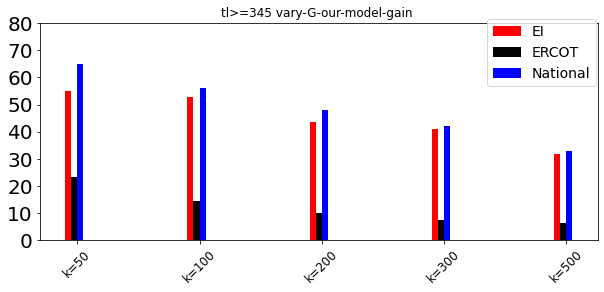

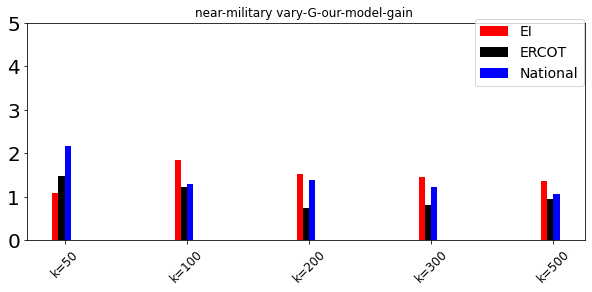

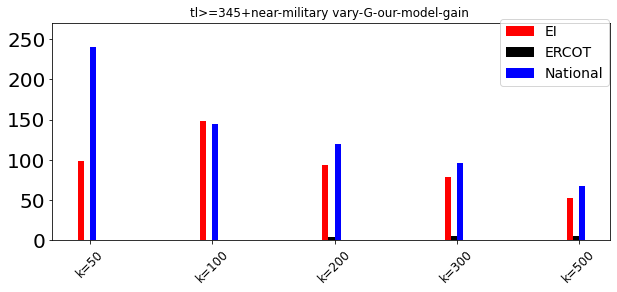

In [5]:
title='vary-G-our-model-gain '
k=np.array([50,100,200,300,500])
rules1=OrderedDict()
#tl>=345
rules1['EI']=np.array([55.03316794,52.91650763,43.39153626,41.15728372,31.74990458])
rules1['ERCOT']=np.array([23.25745174,14.53590734,10.17513514,7.631351351,6.323119691])
rules1['National']=np.array([64.96679518,56.10768675,47.98683735,42.08076506,32.92635301])

rules2=OrderedDict()
#near-mil
rules2['EI']=np.array([3.155868545,5.364976526,4.418215962,4.207824726,3.913276995])
rules2['ERCOT']=np.array([4.033714286,3.361428571,2.016857143,2.240952381,2.621914286])
rules2['National']=np.array([6.229545346,3.681094977,3.964256129,3.492320876,3.058140443])


rules3=OrderedDict()
#tl>=345+near-mil
rules3['EI']=np.array([98.59,147.88,93.66,78.87,53.24])
rules3['ERCOT']=np.array([0,0,4.278181818,5.704242424,5.133818182])
rules3['National']=np.array([240.3151515,144.1890909,120.1575758,96.12606061,67.28824242])


#'''

num_rules=3


mean_gain=np.zeros(num_rules)
mean_gain[0]=(np.max(rules1['EI'])+np.max(rules1['ERCOT'])+np.max(rules1['National']))/3
mean_gain[1]=(np.max(rules2['EI'])+np.max(rules2['ERCOT'])+np.max(rules2['National']))/3
mean_gain[2]=(np.max(rules3['EI'])+np.max(rules3['ERCOT'])+np.max(rules3['National']))/3
'''
for i in range(num_rules):
    mean_gain[i]=rules1['EI'][i]+rules1['ERCOT'][i]+rules1['National'][i]
'''
print(mean_gain)

xticklabels=['k=50','k=100','k=200','k=300','k=500']

color=['r','k','b']

plot_grouped_bar_chart(rules1,xticklabels,"tl>=345",title,yl=80,color=color)
plot_grouped_bar_chart(rules2,xticklabels,"near-military",title,yl=5,color=color)
plot_grouped_bar_chart(rules3,xticklabels,"tl>=345+near-military",title,yl=270,color=color)


[0.1   0.15  0.095 0.08  0.054]
[0.         0.         0.005      0.00666667 0.006     ]
[0.2   0.12  0.1   0.08  0.056]
bar chart
[0.1   0.15  0.095 0.08  0.054]


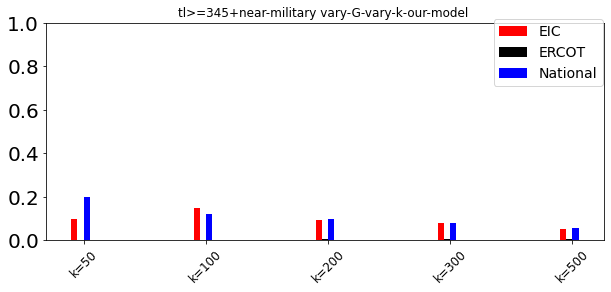

In [13]:
title2='vary-G-vary-k-our-model '
k=np.array([50,100,200,300,500])
'''
#tl>=345
eic=np.array([39,75,123,175,225])
ercot=np.array([32,40,56,63,87])
national=np.array([44,76,130,171,223])


#near-mil
eic=np.array([5,17,28,40,62])
ercot=np.array([6,10,12,20,39])
national=np.array([11,13,28,37,54])
'''

#'''
#tl>=345+near-mil
eic=np.array([5,15,19,24,27])
ercot=np.array([0,0,1,2,3])
national=np.array([10,12,20,24,28])
#'''

num_rules=5

eic1=np.zeros(num_rules)
ercot1=np.zeros(num_rules)
national1=np.zeros(num_rules)
for i in range(num_rules):
    #print(ic[i]/k[i])
    eic1[i]=eic[i]/k[i]
    ercot1[i]=ercot[i]/k[i]
    national1[i]=national[i]/k[i]

print(eic1)
print(ercot1)
print(national1)
rules_ab=OrderedDict()
rules_ab['EIC']=eic1
rules_ab['ERCOT']=ercot1
rules_ab['National']=national1
'''
mean_gain=np.zeros(num_rules)

for i in range(num_rules):
    mean_gain[i]=rules_ab['our_model'][i]-rules_ab['random'][i]

print(mean_gain)
'''
xticklabels=['k=50','k=100','k=200','k=300','k=500']

figname="tl>=345+near-military"
color=['r','k','b']
#color2=['r','y','b','k','m','g']
#plot_grouped_bar_chart(rules,xticklabels,figname,title1,color=color)

plot_grouped_bar_chart(rules_ab,xticklabels,figname,title2,yl=1,color=color)


[0.02       0.04       0.04       0.03666667 0.032     ]
[0.02       0.07       0.03       0.02666667 0.03      ]
[0.08       0.01       0.04       0.03666667 0.036     ]
bar chart
[0.02       0.04       0.04       0.03666667 0.032     ]


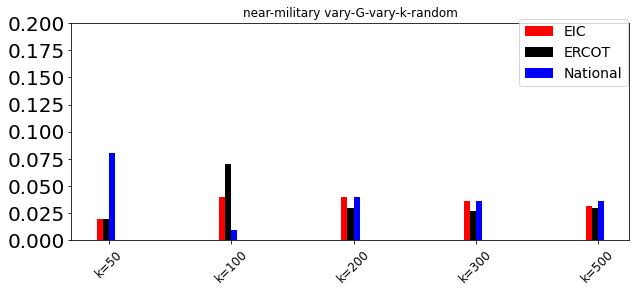

In [20]:
title2='vary-G-vary-k-random'
k=np.array([50,100,200,300,500])
'''
#tl>=345
eic=np.array([0,3,1,2,6])
ercot=np.array([8,2,10,7,7])
national=np.array([0,0,1,5,4])

'''
#near-mil
eic=np.array([1,4,8,11,16])
ercot=np.array([1,7,6,8,15])
national=np.array([4,1,8,11,18])
#'''

'''
#tl>=345+near-mil
eic=np.array([0,0,0,0,0])
ercot=np.array([0,0,0,0,0])
national=np.array([0,0,0,0,0])
'''

num_rules=5

eic1=np.zeros(num_rules)
ercot1=np.zeros(num_rules)
national1=np.zeros(num_rules)
for i in range(num_rules):
    #print(ic[i]/k[i])
    eic1[i]=eic[i]/k[i]
    ercot1[i]=ercot[i]/k[i]
    national1[i]=national[i]/k[i]

print(eic1)
print(ercot1)
print(national1)
rules_ab=OrderedDict()
rules_ab['EIC']=eic1
rules_ab['ERCOT']=ercot1
rules_ab['National']=national1
'''
mean_gain=np.zeros(num_rules)

for i in range(num_rules):
    mean_gain[i]=rules_ab['our_model'][i]-rules_ab['random'][i]

print(mean_gain)
'''
xticklabels=['k=50','k=100','k=200','k=300','k=500']

#figname="tl>=345"#+near-military"
figname="near-military"
color=['r','k','b']
#color2=['r','y','b','k','m','g']
#plot_grouped_bar_chart(rules,xticklabels,figname,title1,color=color)

plot_grouped_bar_chart(rules_ab,xticklabels,figname,title2,yl=0.2,color=color)


[0.02       0.03       0.035      0.02333333 0.0225     0.02
 0.014     ]
[0.02       0.03       0.04       0.02666667 0.0275     0.03
 0.028     ]
[0.     0.02   0.025  0.03   0.0275 0.026  0.022 ]
bar chart
[0.02       0.03       0.035      0.02333333 0.0225     0.02
 0.014     ]


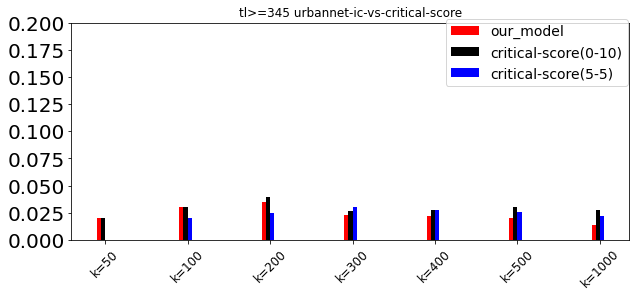

In [31]:
title2='urbannet-ic-vs-critical-score'
#k=np.array([50,100,200,300,400,500,1000])
k=np.array([50,100,200,300,500,1000])

#tl>=345
ic=np.array([1,3,7,8,9,10,22])
cr1=np.array([1,3,8,8,11,15,28])
cr2=np.array([0,2,5,9,11,13,22])
'''
#near-mil
ic=np.array([5,16,26,39,56,71,133])
cr1=np.array([4,13,22,39,54,69,143])
cr2=np.array([3,4,14,19,26,35,69])
'''
num_rules=5

ic1=np.zeros(num_rules)
cr11=np.zeros(num_rules)
cr21=np.zeros(num_rules)
for i in range(num_rules):
    #print(ic[i]/k[i])
    ic1[i]=ic[i]/k[i]
    cr11[i]=cr1[i]/k[i]
    cr21[i]=cr2[i]/k[i]

print(ic1)
print(cr11)
print(cr21)
rules_ab=OrderedDict()
rules_ab['our_model']=ic1
rules_ab['critical-score(0-10)']=cr11
rules_ab['critical-score(5-5)']=cr21
#rules_ab['K']=np.array([9,5,2,2])/k
#rules_ab['U']=np.array([24,23,16,16])/k
#rules_ab['no_domain_rule']=np.array([24,23,16,16])/k
#rules_ab['random_gaussian']=np.array([2,2,0,0])/k
#print(rules_ab['our_model'])

'''
mean_gain=np.zeros(num_rules)

for i in range(num_rules):
    mean_gain[i]=rules_ab['our_model'][i]-rules_ab['random'][i]

print(mean_gain)
'''
xticklabels=['k=50','k=100','k=200','k=300','k=400','k=500','k=1000']

figname="tl>=345"
color=['r','k','b']
#color2=['r','y','b','k','m','g']
#plot_grouped_bar_chart(rules,xticklabels,figname,title1,color=color)

plot_grouped_bar_chart(rules_ab,xticklabels,figname,title2,yl=0.2,color=color)


bar chart
[0.48 0.46 0.32 0.32]


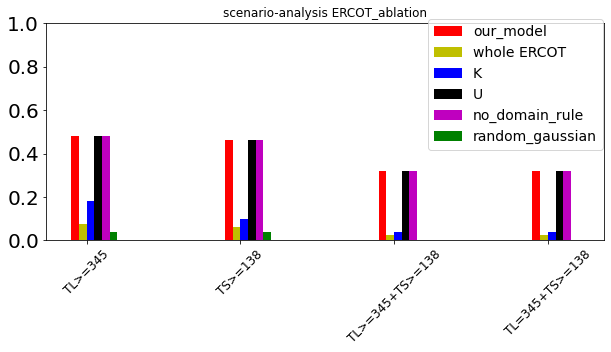

In [6]:
title2='ERCOT (top k)'
k=50
rules=OrderedDict()
rules['our_model']=np.array([24,23,16,16])/k
rules['page_rank_weighted']=np.array([30,40,30,30])/k
rules['degree_central']=np.array([16,18,9,9])/k
rules['p_1']=np.array([9,5,2,2])/k
rules['p_0.5']=np.array([7,7,1,1])/k
rules['p_0.1']=np.array([4,2,0,0])/k

rules_ab=OrderedDict()
rules_ab['our_model']=np.array([24,23,16,16])/k
rules_ab['whole ERCOT']=np.array([259/3456,207/3456,89/3456,89/3456])
rules_ab['K']=np.array([9,5,2,2])/k
rules_ab['U']=np.array([24,23,16,16])/k
rules_ab['no_domain_rule']=np.array([24,23,16,16])/k
rules_ab['random_gaussian']=np.array([2,2,0,0])/k


xticklabels=['TL>=345','TS>=138','TL>=345+TS>=138','TL=345+TS>=138']

figname="scenario-analysis"
color=['r','y','b','k','m','g']
#color2=['r','y','b','k','m','g']
#plot_grouped_bar_chart(rules,xticklabels,figname,title1,color=color)

plot_grouped_bar_chart(rules_ab,xticklabels,figname,title2,color=color)


bar chart
[0.48, 0.047619047619047616, 0.08, 0.12]


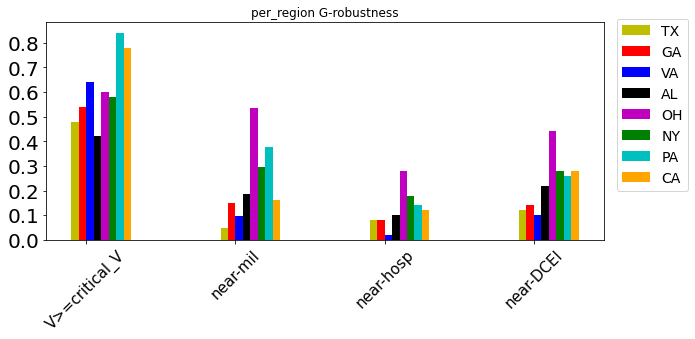

In [16]:
title='G-robustness'
k=50
state=['TX','GA','VA','AL','OH','NY','PA','CA']
#state=['TX','GA','VA','OH','NY','PA','CA']
#orig_mil=[42,20,42,32,15,17,16,50]
orig_mil={'TX':42,'GA':20,'VA':42,'AL':32,'OH':15,'NY':17,'PA':16,'CA':50}
rules={}
rules['TX']=[24,2,4,6]
rules['GA']=[27,3,4,7]
rules['VA']=[32,4,1,5]
rules['AL']=[21,6,5,11]
rules['OH']=[30,8,14,22]
rules['NY']=[29,5,9,14]
rules['PA']=[42,6,7,13]
rules['CA']=[39,8,6,14]

per_dict=OrderedDict()
for reg in state:
    l=rules[reg]
    tl=[l[0]/k,l[1]/orig_mil[reg],l[2]/k,l[3]/k]
    per_dict[reg]=tl

xticklabels=['V>=critical_V','near-mil','near-hosp','near-DCEI']
figname="per_region"
color=['y','r','b','k','m','g','c','orange']
plot_grouped_bar_chart(per_dict,xticklabels,figname,title,color=color)


bar chart
[0.66 0.17 0.13 0.47 0.33]


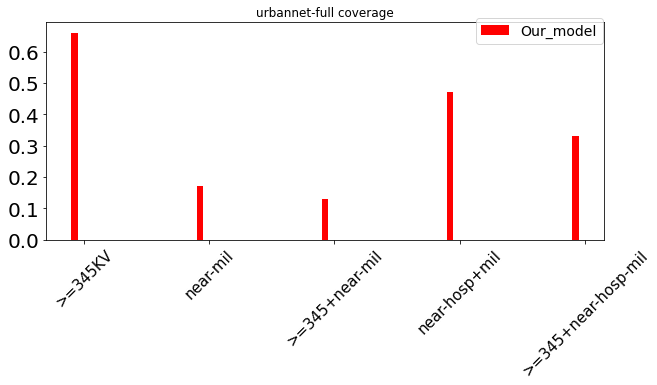

In [5]:
title='coverage'
k=100
our_model=np.array([66,17,13,47,33])
per_dict=OrderedDict({'Our_model':our_model/k})
xticklabels=['>=345KV','near-mil','>=345+near-mil','near-hosp+mil','>=345+near-hosp-mil']

figname="urbannet-full"

plot_grouped_bar_chart(per_dict,xticklabels,figname,title,color=['r'])


bar chart
[0.52 0.1  0.   0.16 0.  ]


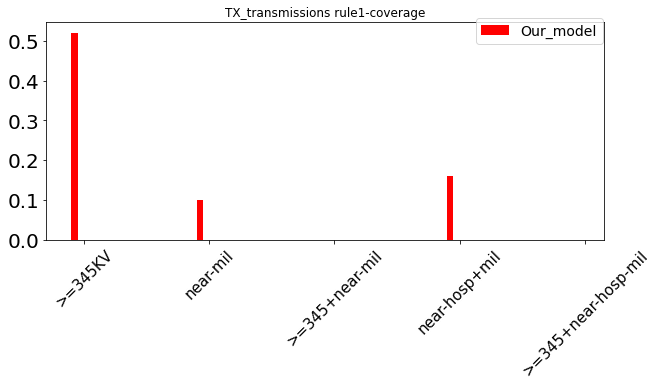

In [14]:
from collections import OrderedDict 
title='rule1-coverage'
k=50
our_model=np.array([26,5,0,8,0])
#our_model=np.array([46,4,4,16,26])
per_dict=OrderedDict({'Our_model':our_model/k})

xticklabels=['>=345KV','near-mil','>=345+near-mil','near-hosp+mil','>=345+near-hosp-mil']
#xticklabels=['>=138','==69','==230','==138','TES V>=138']

figname="TX_transmissions"

plot_grouped_bar_chart(per_dict,xticklabels,figname,title,color=['r'])


bar chart
[0.18 0.06 0.   0.08 0.  ]


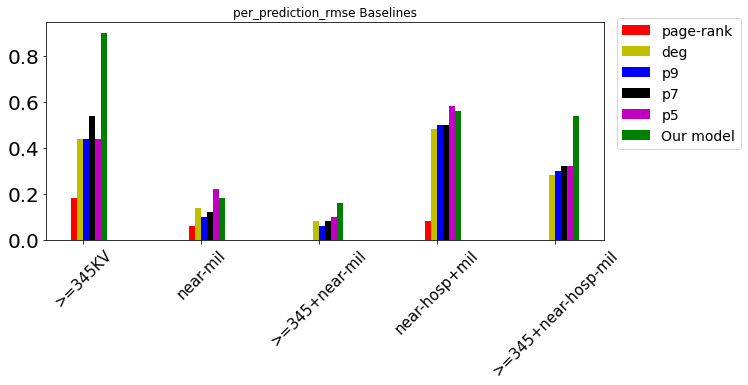

In [13]:
from collections import OrderedDict 

title='Baselines'
k=50
#for epiweek in range(9,17):
per_page_rank=np.array([9,3,0,4,0])
per_deg=np.array([22,7,4,24,14])
our_model=np.array([45,9,8,28,27])
p_9=np.array([22,5,3,25,15])
p_7=np.array([27,6,4,25,16])
p_5=np.array([22,11,5,29,16])

errs_dict=OrderedDict({'page-rank':per_page_rank/k,'deg':per_deg/k,'p9':p_9/k,'p7':p_7/k,'p5':p_5/k,'Our model':our_model/k})
#errs_dict=OrderedDict({'page-rank':rmse_cali,'Epideep':rmse_epideep,'ARIMA':rmse_arima})

xticklabels=['>=345KV','near-mil','>=345+near-mil','near-hosp+mil','>=345+near-hosp-mil']

figname="per_prediction_rmse"

plot_grouped_bar_chart(errs_dict,xticklabels,figname,title,color=['r','y','b','k','m','g'])


6


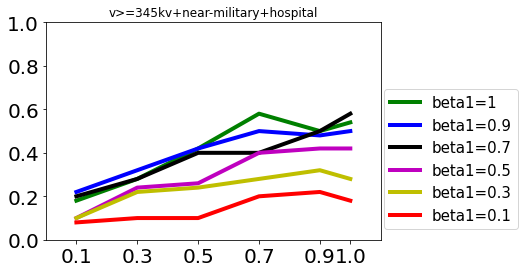

In [31]:
x=np.array([1,0.9,0.7,0.5,0.3,0.1])
k=50
title='v>=345kv+near-military+hospital'
'''
#v>=345kv
b1_1=np.array([45,43,44,38,29,22])
b1_09=np.array([43,42,39,36,28,23])
b1_07=np.array([44,39,37,36,28,22])
b1_05=np.array([38,36,36,28,24,18])
b1_03=np.array([29,28,28,24,23,15])
b1_01=np.array([22,23,22,18,15,12])
'''
#v>=345kv+near-military
b1_1=np.array([8,7,10,6,6,3])
b1_09=np.array([7,6,7,7,7,4])
b1_07=np.array([10,7,6,6,5,2])
b1_05=np.array([6,7,6,5,5,1])
b1_03=np.array([6,7,5,5,4,2])
b1_01=np.array([3,4,2,1,2,1])

#v>=345kv+near-military-hospital
fb1_1=b1_1+np.array([19,18,19,15,8,6])
fb1_09=b1_09+np.array([18,18,18,14,9,7])
fb1_07=b1_07+np.array([19,18,14,14,9,8])
fb1_05=b1_05+np.array([15,14,14,8,7,4])
fb1_03=b1_03+np.array([8,9,9,7,7,3])
fb1_01=b1_01+np.array([6,7,8,4,3,3])
#'''
plot_edge_robustness(x,k,fb1_1,fb1_09,fb1_07,fb1_05,fb1_03,fb1_01,title)